# Python Glob: find files

glob is a powerful tool for finding files in the file system.
It is useful when you need to look for a list of files with names matching a pattern. 
For example, a list of filenames that all have a certain extension, prefix, or some common strings in the middle.

**Advanced:** The pattern rules for glob are not regular expressions. Instead, they follow standard Unix path expansion rules.

See https://docs.python.org/2/library/glob.html


In [1]:
import glob

In [2]:
!find Data/Glob

Data/Glob
Data/Glob/b2.dat
Data/Glob/f7.txt
Data/Glob/f9.txt
Data/Glob/f8.txt
Data/Glob/f1.txt
Data/Glob/f6.txt
Data/Glob/a1.dat
Data/Glob/b4.dat
Data/Glob/b3.dat
Data/Glob/f5.txt
Data/Glob/a2.dat
Data/Glob/f2.txt
Data/Glob/subdir1
Data/Glob/subdir1/x1.doc
Data/Glob/subdir1/x3.pdf
Data/Glob/subdir1/x2.doc
Data/Glob/b1.dat
Data/Glob/f3.txt
Data/Glob/f4.txt
Data/Glob/a3.dat
Data/Glob/subdir2
Data/Glob/subdir2/script.sh
Data/Glob/subdir2/program.py
Data/Glob/subdir2/cool.app


## extension

In [3]:
glob.glob('Data/Glob/*.dat')

['Data/Glob/b2.dat',
 'Data/Glob/a1.dat',
 'Data/Glob/b4.dat',
 'Data/Glob/b3.dat',
 'Data/Glob/a2.dat',
 'Data/Glob/b1.dat',
 'Data/Glob/a3.dat']

In [4]:
file_list = glob.glob('Data/Glob/*.txt')
file_list

['Data/Glob/f7.txt',
 'Data/Glob/f9.txt',
 'Data/Glob/f8.txt',
 'Data/Glob/f1.txt',
 'Data/Glob/f6.txt',
 'Data/Glob/f5.txt',
 'Data/Glob/f2.txt',
 'Data/Glob/f3.txt',
 'Data/Glob/f4.txt']

In [5]:
# Sorting
file_list = sorted(file_list)
file_list

['Data/Glob/f1.txt',
 'Data/Glob/f2.txt',
 'Data/Glob/f3.txt',
 'Data/Glob/f4.txt',
 'Data/Glob/f5.txt',
 'Data/Glob/f6.txt',
 'Data/Glob/f7.txt',
 'Data/Glob/f8.txt',
 'Data/Glob/f9.txt']

## Prefix

In [6]:
glob.glob('Data/Glob/a*')

['Data/Glob/a1.dat', 'Data/Glob/a2.dat', 'Data/Glob/a3.dat']

## Match single character

In [7]:
glob.glob('Data/Glob/a?.dat')

['Data/Glob/a1.dat', 'Data/Glob/a2.dat', 'Data/Glob/a3.dat']

## Files from more than one subdirs

In [8]:
glob.glob('Data/Glob/sub*/*')

['Data/Glob/subdir1/x1.doc',
 'Data/Glob/subdir1/x3.pdf',
 'Data/Glob/subdir1/x2.doc',
 'Data/Glob/subdir2/script.sh',
 'Data/Glob/subdir2/program.py',
 'Data/Glob/subdir2/cool.app']

## recursion
** only works for python>=3.5 **

In [9]:
file_list = glob.glob('Data/Glob/**', recursive=True)
file_list

['Data/Glob/',
 'Data/Glob/b2.dat',
 'Data/Glob/f7.txt',
 'Data/Glob/f9.txt',
 'Data/Glob/f8.txt',
 'Data/Glob/f1.txt',
 'Data/Glob/f6.txt',
 'Data/Glob/a1.dat',
 'Data/Glob/b4.dat',
 'Data/Glob/b3.dat',
 'Data/Glob/f5.txt',
 'Data/Glob/a2.dat',
 'Data/Glob/f2.txt',
 'Data/Glob/subdir1',
 'Data/Glob/subdir1/x1.doc',
 'Data/Glob/subdir1/x3.pdf',
 'Data/Glob/subdir1/x2.doc',
 'Data/Glob/b1.dat',
 'Data/Glob/f3.txt',
 'Data/Glob/f4.txt',
 'Data/Glob/a3.dat',
 'Data/Glob/subdir2',
 'Data/Glob/subdir2/script.sh',
 'Data/Glob/subdir2/program.py',
 'Data/Glob/subdir2/cool.app']

# For Loop

In [10]:
file_list = glob.glob('Data/Glob/*.txt')
for file in file_list:
    print(file)

Data/Glob/f7.txt
Data/Glob/f9.txt
Data/Glob/f8.txt
Data/Glob/f1.txt
Data/Glob/f6.txt
Data/Glob/f5.txt
Data/Glob/f2.txt
Data/Glob/f3.txt
Data/Glob/f4.txt


In [11]:
for i, file in enumerate(file_list):
    print(i, file)

0 Data/Glob/f7.txt
1 Data/Glob/f9.txt
2 Data/Glob/f8.txt
3 Data/Glob/f1.txt
4 Data/Glob/f6.txt
5 Data/Glob/f5.txt
6 Data/Glob/f2.txt
7 Data/Glob/f3.txt
8 Data/Glob/f4.txt


In [12]:
N = len(file_list)
for i in range(N):
    print(i, file_list[i])

0 Data/Glob/f7.txt
1 Data/Glob/f9.txt
2 Data/Glob/f8.txt
3 Data/Glob/f1.txt
4 Data/Glob/f6.txt
5 Data/Glob/f5.txt
6 Data/Glob/f2.txt
7 Data/Glob/f3.txt
8 Data/Glob/f4.txt


In [13]:
N = len(file_list)
for i, file in zip(range(N), file_list):
    print(i, file)

0 Data/Glob/f7.txt
1 Data/Glob/f9.txt
2 Data/Glob/f8.txt
3 Data/Glob/f1.txt
4 Data/Glob/f6.txt
5 Data/Glob/f5.txt
6 Data/Glob/f2.txt
7 Data/Glob/f3.txt
8 Data/Glob/f4.txt


## while loop

In [14]:
N = len(file_list)
i = 0
while i<N:
    print(i, file_list[i])
    i+=1

0 Data/Glob/f7.txt
1 Data/Glob/f9.txt
2 Data/Glob/f8.txt
3 Data/Glob/f1.txt
4 Data/Glob/f6.txt
5 Data/Glob/f5.txt
6 Data/Glob/f2.txt
7 Data/Glob/f3.txt
8 Data/Glob/f4.txt


## list comprehension

In [15]:
l = list(range(10))
print (l)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [16]:
[x**3 for x in l]

[0, 1, 8, 27, 64, 125, 216, 343, 512, 729]

In [17]:
[x**2 for x in l if x%2==0]

[0, 4, 16, 36, 64]

In [18]:
noprimes = [j for i in range(2, 8) for j in range(i*2, 50, i)]
primes = [x for x in range(2, 50) if x not in noprimes]
print (primes)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]


In [19]:
words = 'The quick brown fox jumps over the lazy dog'.split()
[[w.upper(), w.lower(), len(w)] for w in words]

[['THE', 'the', 3],
 ['QUICK', 'quick', 5],
 ['BROWN', 'brown', 5],
 ['FOX', 'fox', 3],
 ['JUMPS', 'jumps', 5],
 ['OVER', 'over', 4],
 ['THE', 'the', 3],
 ['LAZY', 'lazy', 4],
 ['DOG', 'dog', 3]]

# Path

In [20]:
import os, glob

## Current path

In [21]:
os.getcwd()

'/SNS/users/lj7/dv/sje/IPythonNotebookTutorial'

## Path manipulation

In [22]:
p = '/a/b/c/d/e'

In [23]:
f = os.path.join(p, 'f.txt')

In [24]:
os.path.split(f)

('/a/b/c/d/e', 'f.txt')

In [25]:
os.path.splitext(f)

('/a/b/c/d/e/f', '.txt')

In [26]:
file_list = glob.glob('Data/Glob/*.txt')
file = file_list[0]

print("* File path")
print("Absolute Path: {}".format(os.path.abspath(file)))
print("Base Name:     {}".format(os.path.basename(file)))
print("Parent dir:    {}".format(os.path.dirname(file)))

* File path
Absolute Path: /SNS/users/lj7/dv/sje/IPythonNotebookTutorial/Data/Glob/f7.txt
Base Name:     f7.txt
Parent dir:    Data/Glob


## "~"

In [27]:
os.path.expanduser('~/a/b/c')

'/home/lj7/a/b/c'

## python path

In [28]:
import sys

In [29]:
sys.path

['',
 '/home/lj7/miniconda2/envs/py3/lib/python36.zip',
 '/home/lj7/miniconda2/envs/py3/lib/python3.6',
 '/home/lj7/miniconda2/envs/py3/lib/python3.6/lib-dynload',
 '/home/lj7/miniconda2/envs/py3/lib/python3.6/site-packages',
 '/home/lj7/miniconda2/envs/py3/lib/python3.6/site-packages/cycler-0.10.0-py3.6.egg',
 '/home/lj7/miniconda2/envs/py3/lib/python3.6/site-packages/IPython/extensions',
 '/home/lj7/.ipython']

In [30]:
sys.executable

'/home/lj7/miniconda2/envs/py3/bin/python'

# Plotting

In [31]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,6)

# All together

In [32]:
import numpy as np, os

In [33]:
file_list = sorted(glob.glob('Data/Glob/f*.txt'))

<IPython.core.display.Javascript object>


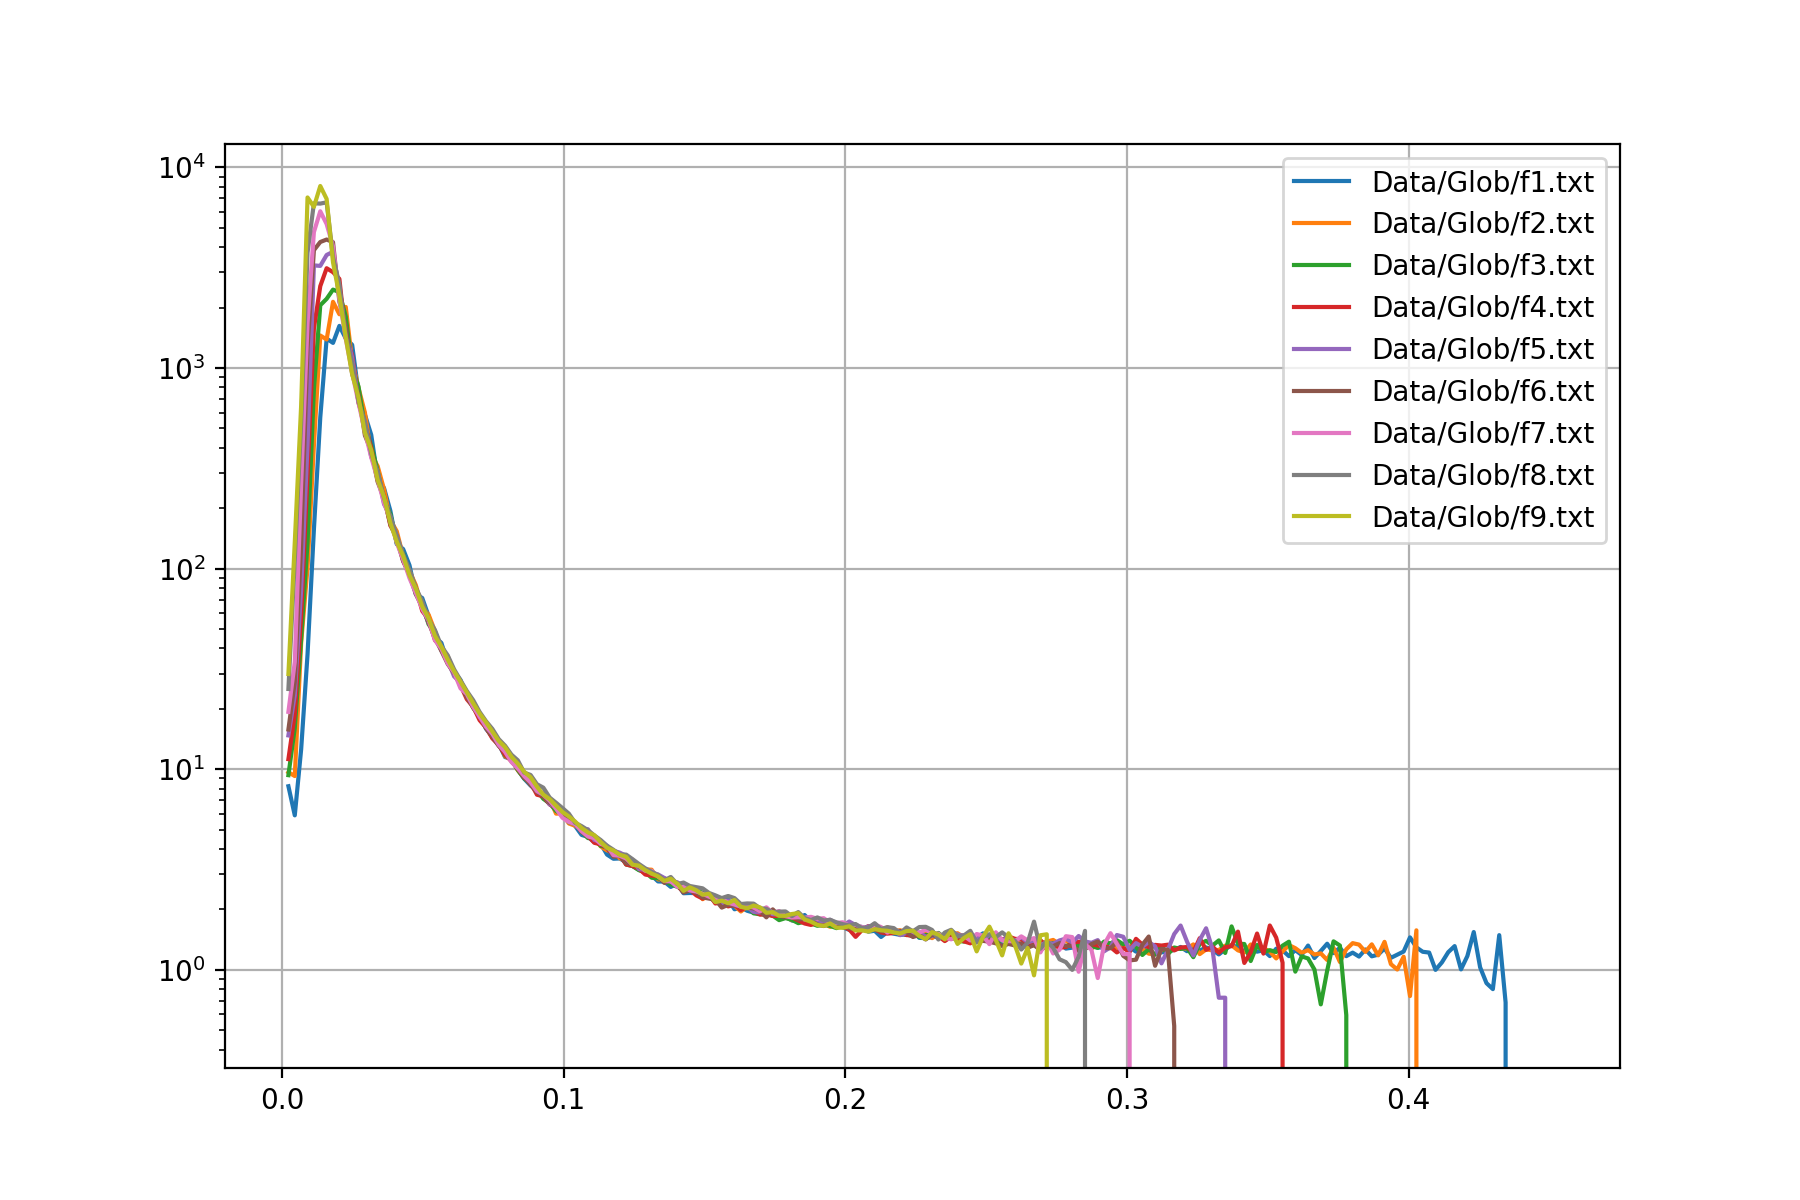

In [34]:
plt.figure()
for file in file_list:
    data = np.genfromtxt(file, delimiter=",", skip_header=2, names='X,Y,E,DX')
    plt.semilogy(data['X'], data['Y'], label=file)
plt.grid()
plt.legend()

## List comprehension; use Axes class

In [35]:
dataset = {}
for fn in file_list:
    dataset[fn] = np.genfromtxt(fn, delimiter=",", skip_header=2, names='X,Y,E,DX')

<IPython.core.display.Javascript object>


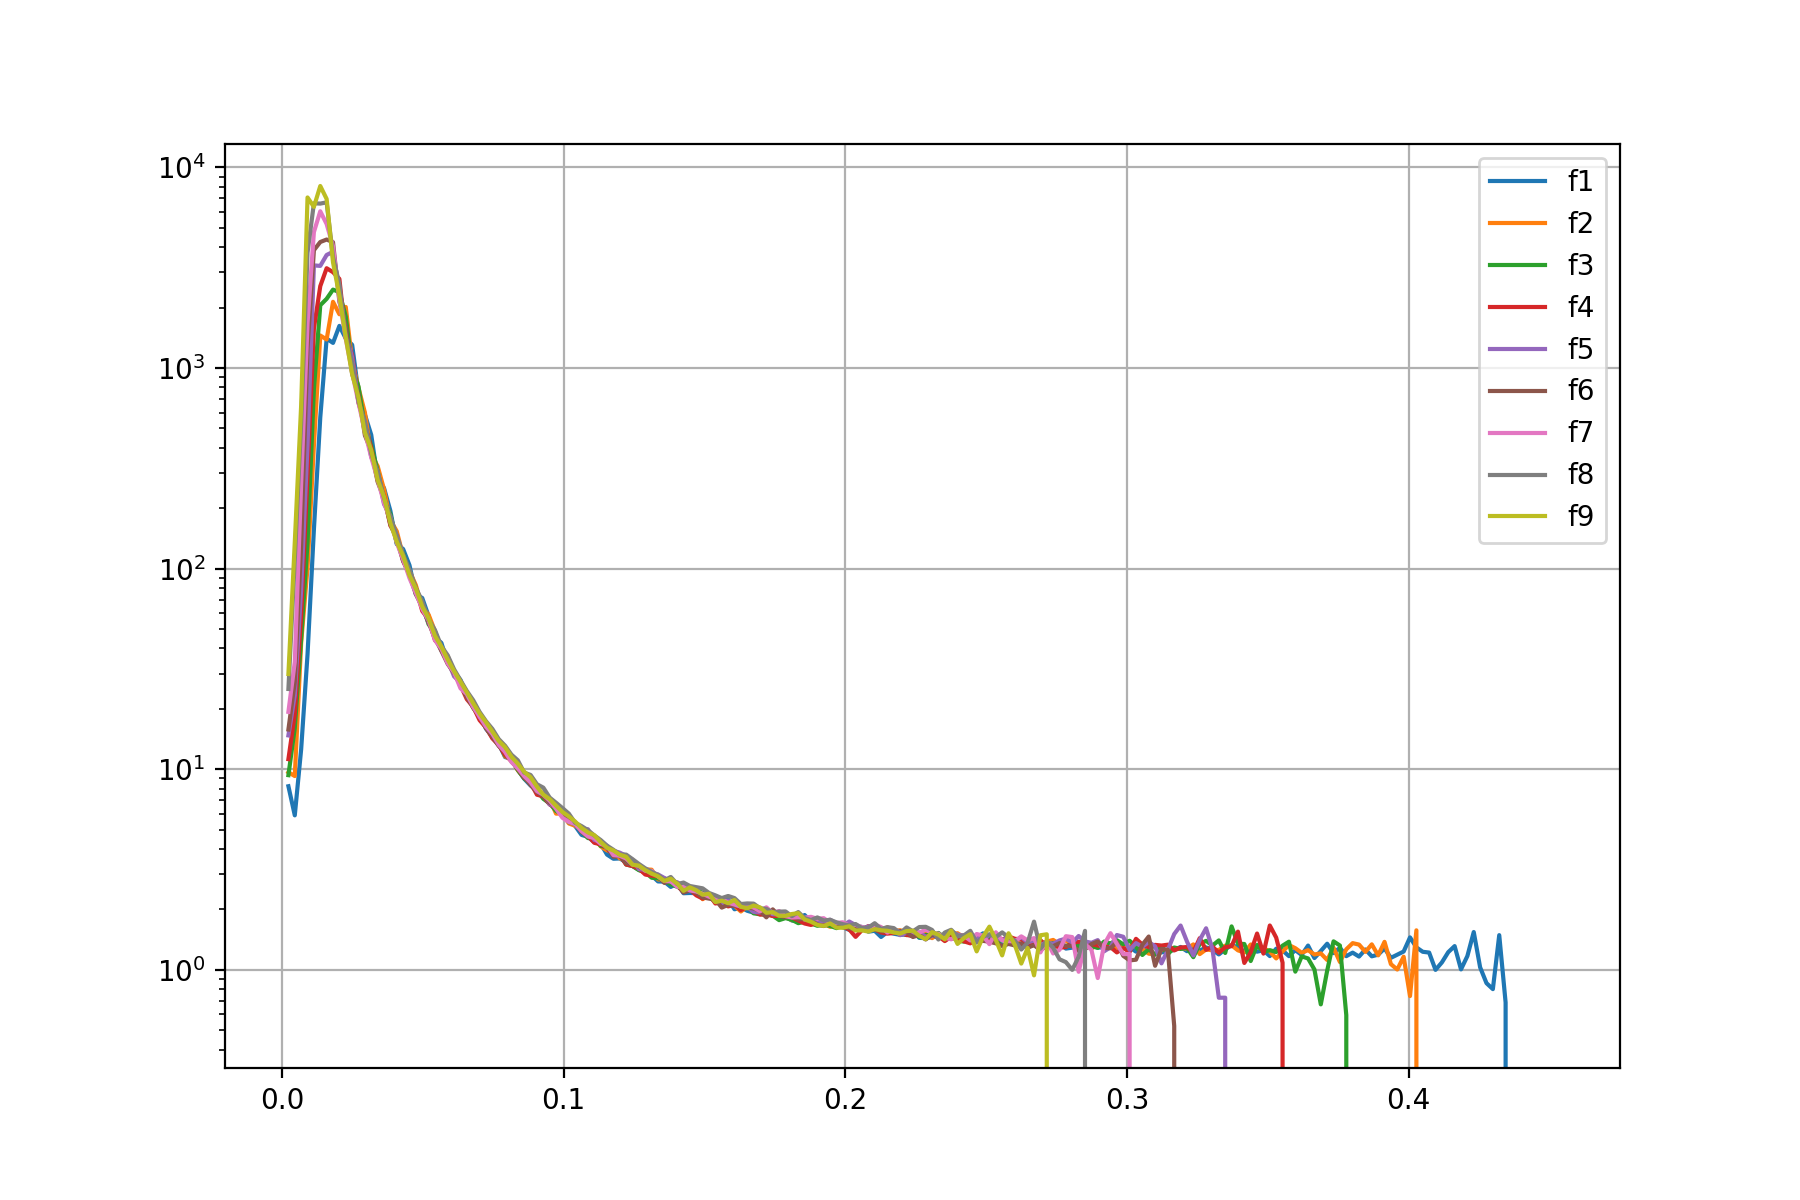

In [36]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
for fn in file_list:
    name = os.path.splitext(os.path.basename(fn))[0]
    data = dataset[fn]
    ax1.semilogy(data['X'], data['Y'], label=name)
ax1.legend()
ax1.grid()

## Use Axes class. Grid

<IPython.core.display.Javascript object>


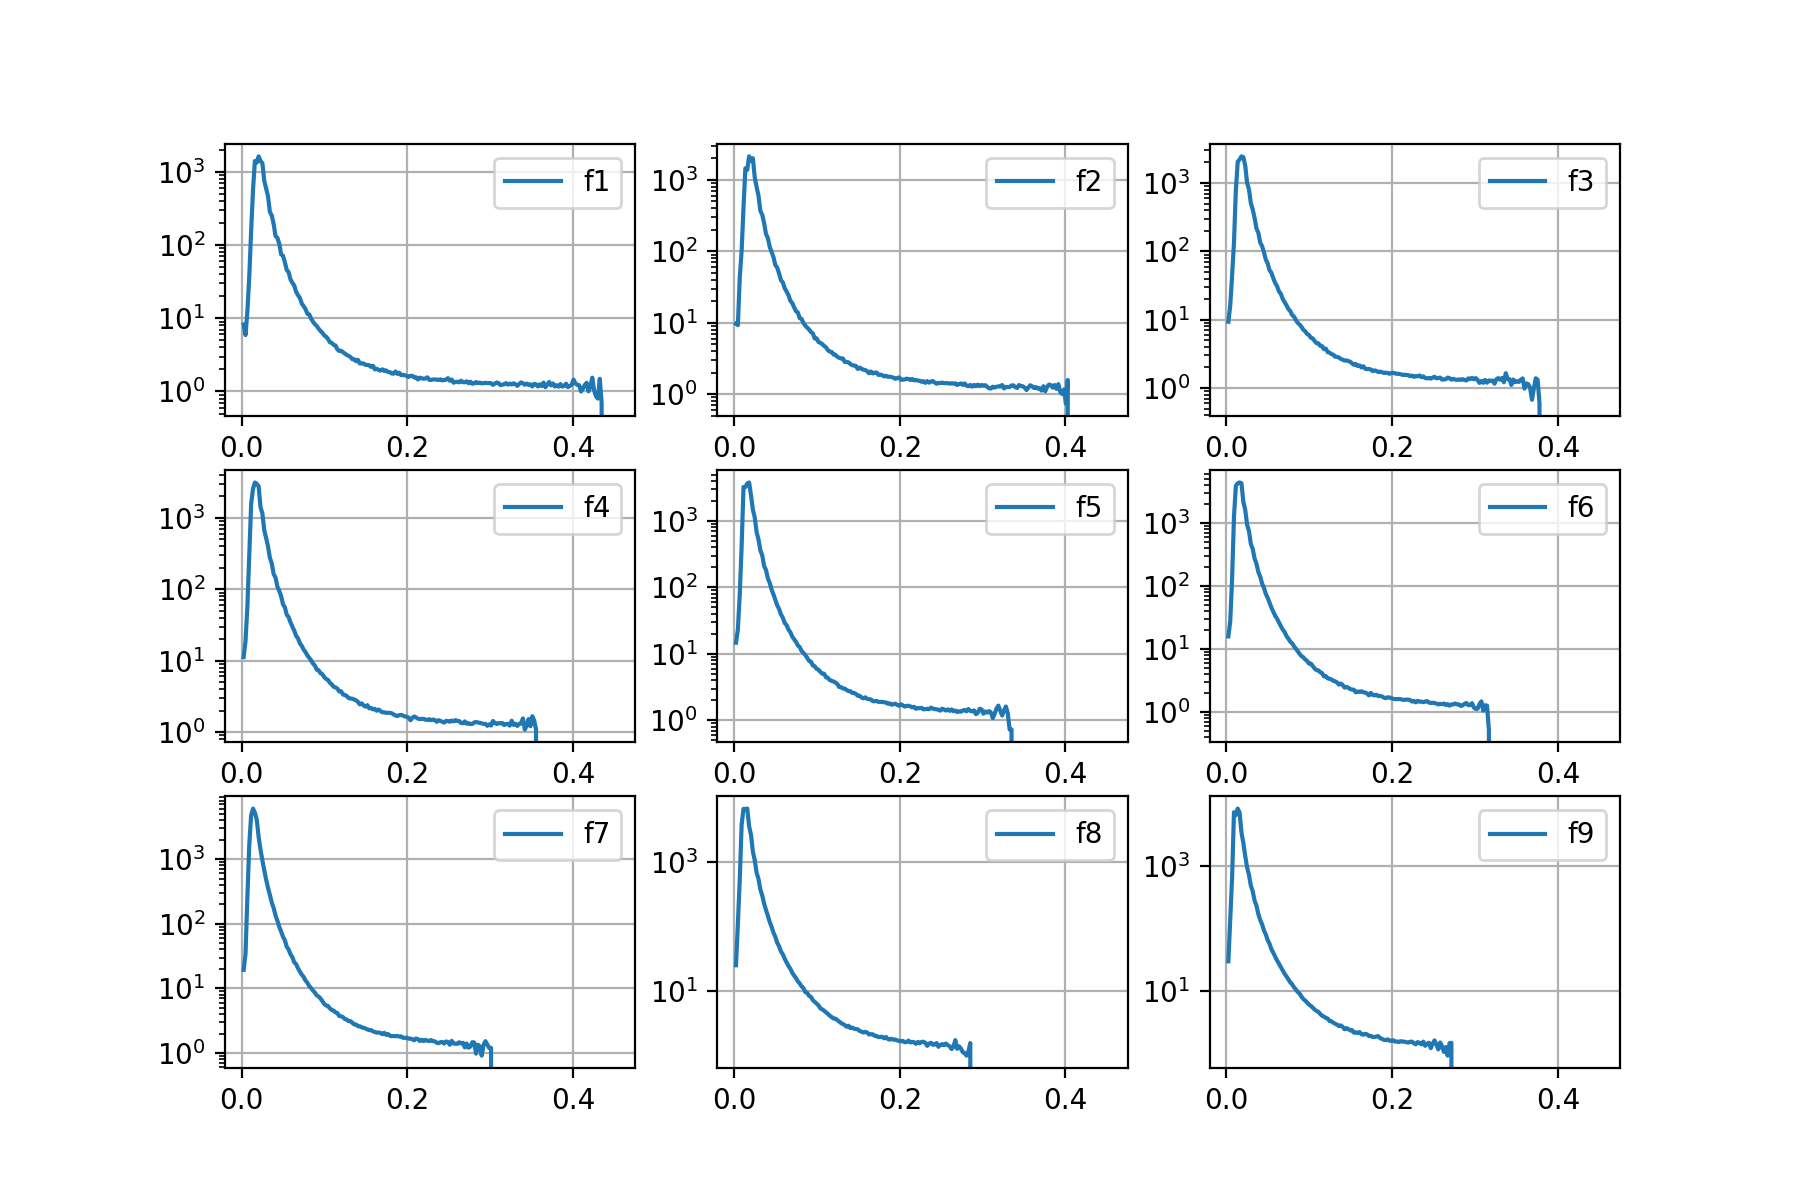

In [37]:
fig = plt.figure()
N = len(dataset)
ncols = 3
nrows = (N-1)//ncols+1
for index, fn in enumerate(file_list):
    name = os.path.splitext(os.path.basename(fn))[0]
    data = dataset[fn]
    ax1 = fig.add_subplot(nrows, ncols, index+1)
    ax1.semilogy(data['X'], data['Y'], label=name)
    ax1.legend()
    ax1.grid()
    continue